# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Import dataset

In [2]:
df = pd.read_csv('StudentsPerformance_with_headers.csv')
df.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


# Summary statistic dari data

## Pre-processing

In [3]:
# cek informasi data tersebut (apakah terdapat null atau tidak)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   STUDENT ID                                                         145 non-null    object
 1   Student Age                                                        145 non-null    int64 
 2   Sex                                                                145 non-null    int64 
 3   Graduated high-school type                                         145 non-null    int64 
 4   Scholarship type                                                   145 non-null    int64 
 5   Additional work                                                    145 non-null    int64 
 6   Regular artistic or sports activity                                145 non-null    int64 
 7   Do you have a partner              

Pada data tersebut, sebanyak 145 baris dari 33 variabel (kolom) seluruhnya berupa non-null dimana 32 bertipe int dan 1 bertipe object yaitu STUDENT ID.

In [4]:
df.isna().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accommodation type in Cyprus                                         0
Mother’s education                                                   0
Father’s education                                                   0
Number of sisters/brothers                                           0
Parent

Pada data tersebut tidak terdapat missing value karena jumlah pada masing-masing variabel setelah dilakukan pengecekan adalah 0.

In [5]:
df.duplicated().sum()

0

In [6]:
# dropping columns because not related
df = df.drop('STUDENT ID', axis = 1)
df.head()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


Kolom STUDENT ID memiliki tipe data yang berbeda dari data lainnya dan tidak memiliki keterkaitan yang kuat dengan variabel lainnya sehingga dapat dibuang (drop) untuk melihat correlation matrixnya

,age,sex,highschool_type,scholarship,add_work,reg_hobby,partner,salary,transport,accommodation,...,midterm_exam_prep_1,midterm_exam_prep_2,notetaking,listens,discussion_helps,flip_class,avg_grade_lastsemes,exp_grade,course,grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


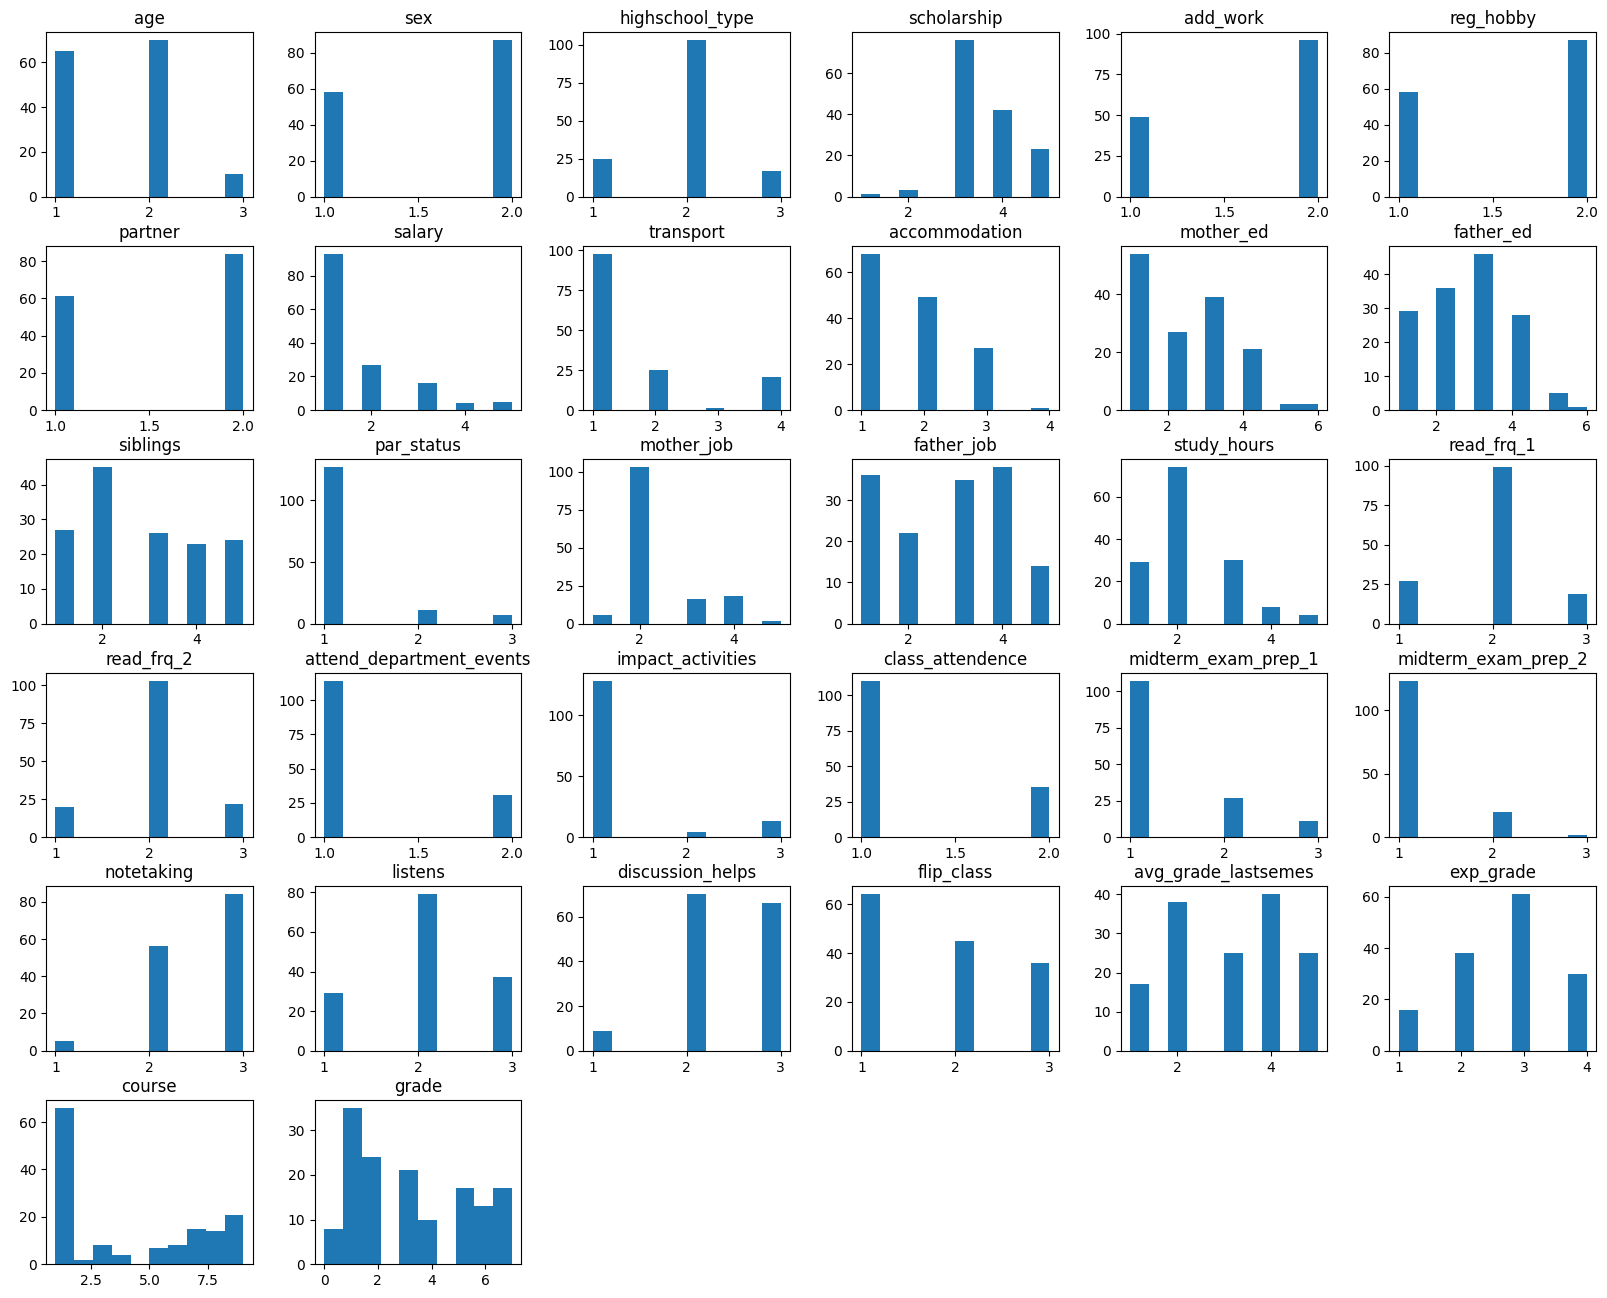

In [7]:
df = df.rename(columns = {'Student Age': 'age', 
                              'Sex': 'sex',
                             'Graduated high-school type':'highschool_type', 
                             'Scholarship type': 'scholarship', 
                             'Additional work': 'add_work', 
                             'Regular artistic or sports activity': 'reg_hobby',
                             'Do you have a partner': 'partner', 
                             'Total salary if available':'salary', 
                             'Transportation to the university': 'transport', 
                             'Accommodation type in Cyprus': 'accommodation', 
                             "Mother’s education": 'mother_ed', 
                             "Father’s education ":'father_ed', 
                             "Parental status": 'par_status',
                             "Number of sisters/brothers": 'siblings',
                             "Mother’s occupation": 'mother_job', 
                             "Father’s occupation": 'father_job', 
                             "Weekly study hours": 'study_hours', 
                             "Reading frequency": 'read_frq_1', 
                             "Reading frequency.1": 'read_frq_2', 
                             'Attendance to the seminars/conferences related to the department': 'attend_department_events', 
                             'Impact of your projects/activities on your success': 'impact_activities', 
                             'Attendance to classes': 'class_attendence', 
                             'Preparation to midterm exams 1': 'midterm_exam_prep_1',
                             'Preparation to midterm exams 2': 'midterm_exam_prep_2', 
                             'Taking notes in classes': 'notetaking', 
                             'Listening in classes': 'listens', 
                             'Discussion improves my interest and success in the course': 'discussion_helps', 
                             'Flip-classroom': 'flip_class',
                             'Cumulative grade point average in the last semester (/4.00)': 'avg_grade_lastsemes',
                             'Expected Cumulative grade point average in the graduation (/4.00)':'exp_grade',
                             'COURSE ID': 'course', 
                             'GRADE': 'grade'})
df.hist(grid = False, figsize = (20, 16))
df.head()

Menurut histogram tersebut, sebagian besar variabelnya tidak berdistribusi normal. Namun, melalui histogram di atas pula, dapat kita lihat bahwa variabel father_ed memiliki diagram yang mendekati distribusi normal.

In [8]:
for column in df.columns:
    print(f"Value counts for column {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for column age:
age
2    70
1    65
3    10
Name: count, dtype: int64


Value counts for column sex:
sex
2    87
1    58
Name: count, dtype: int64


Value counts for column highschool_type:
highschool_type
2    103
1     25
3     17
Name: count, dtype: int64


Value counts for column scholarship:
scholarship
3    76
4    42
5    23
2     3
1     1
Name: count, dtype: int64


Value counts for column add_work:
add_work
2    96
1    49
Name: count, dtype: int64


Value counts for column reg_hobby:
reg_hobby
2    87
1    58
Name: count, dtype: int64


Value counts for column partner:
partner
2    84
1    61
Name: count, dtype: int64


Value counts for column salary:
salary
1    93
2    27
3    16
5     5
4     4
Name: count, dtype: int64


Value counts for column transport:
transport
1    98
2    25
4    21
3     1
Name: count, dtype: int64


Value counts for column accommodation:
accommodation
1    68
2    49
3    27
4     1
Name: count, dtype: int64


Value counts for column

Berdasarkan grafik batang diatas, dapat kita simpulkan bahwa:
1. Age: sebagian besar mahasiswa berumur 22-25 tahun yang berjumlah 70 mahasiswa
2. Sex: sebagian besar mahasiswa adalah perem
3. highschole type : sebagian besar mahasiswa merupakan lulusan dari state yang berjumlah 103 mahasiswa
4. scholarship type : banyak mahasiwa yang mendapatkan scholarship dengan kategori 50% sebanyak 76 mahasiswa, lalu diikti dengan kategori 75% yang berjumlah 42 mahasiswa.
5. par status : untuk fitur status orang tua banyak mahasiswa yang masih lengkap orang tuanya (married) yaitu dengan jumlah mahasiswanya sebanyak 127, lalu untuk mahasiswa yang memiliki orang tua dengan status cerai yaitu berjumlah 11 orang, lalu dengan status meninggal orangtuanya dengan jumlah 7 mahasiswa.
6. study_hours : berdasarkan data, mahasiswa lebih banyak menghabiskan waktu belajar dalam waktu satu minggu dengan durasi <5hours yaitu dengan jumlah 74 mahasiswa.

In [9]:
df.describe()

,age,sex,highschool_type,scholarship,add_work,reg_hobby,partner,salary,transport,accommodation,...,midterm_exam_prep_1,midterm_exam_prep_2,notetaking,listens,discussion_helps,flip_class,avg_grade_lastsemes,exp_grade,course,grade
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


# Eksplorasi data, sajikan data yang mungkin dalam beragam diagram chart

## Exploratory Data Analysis (EDA)

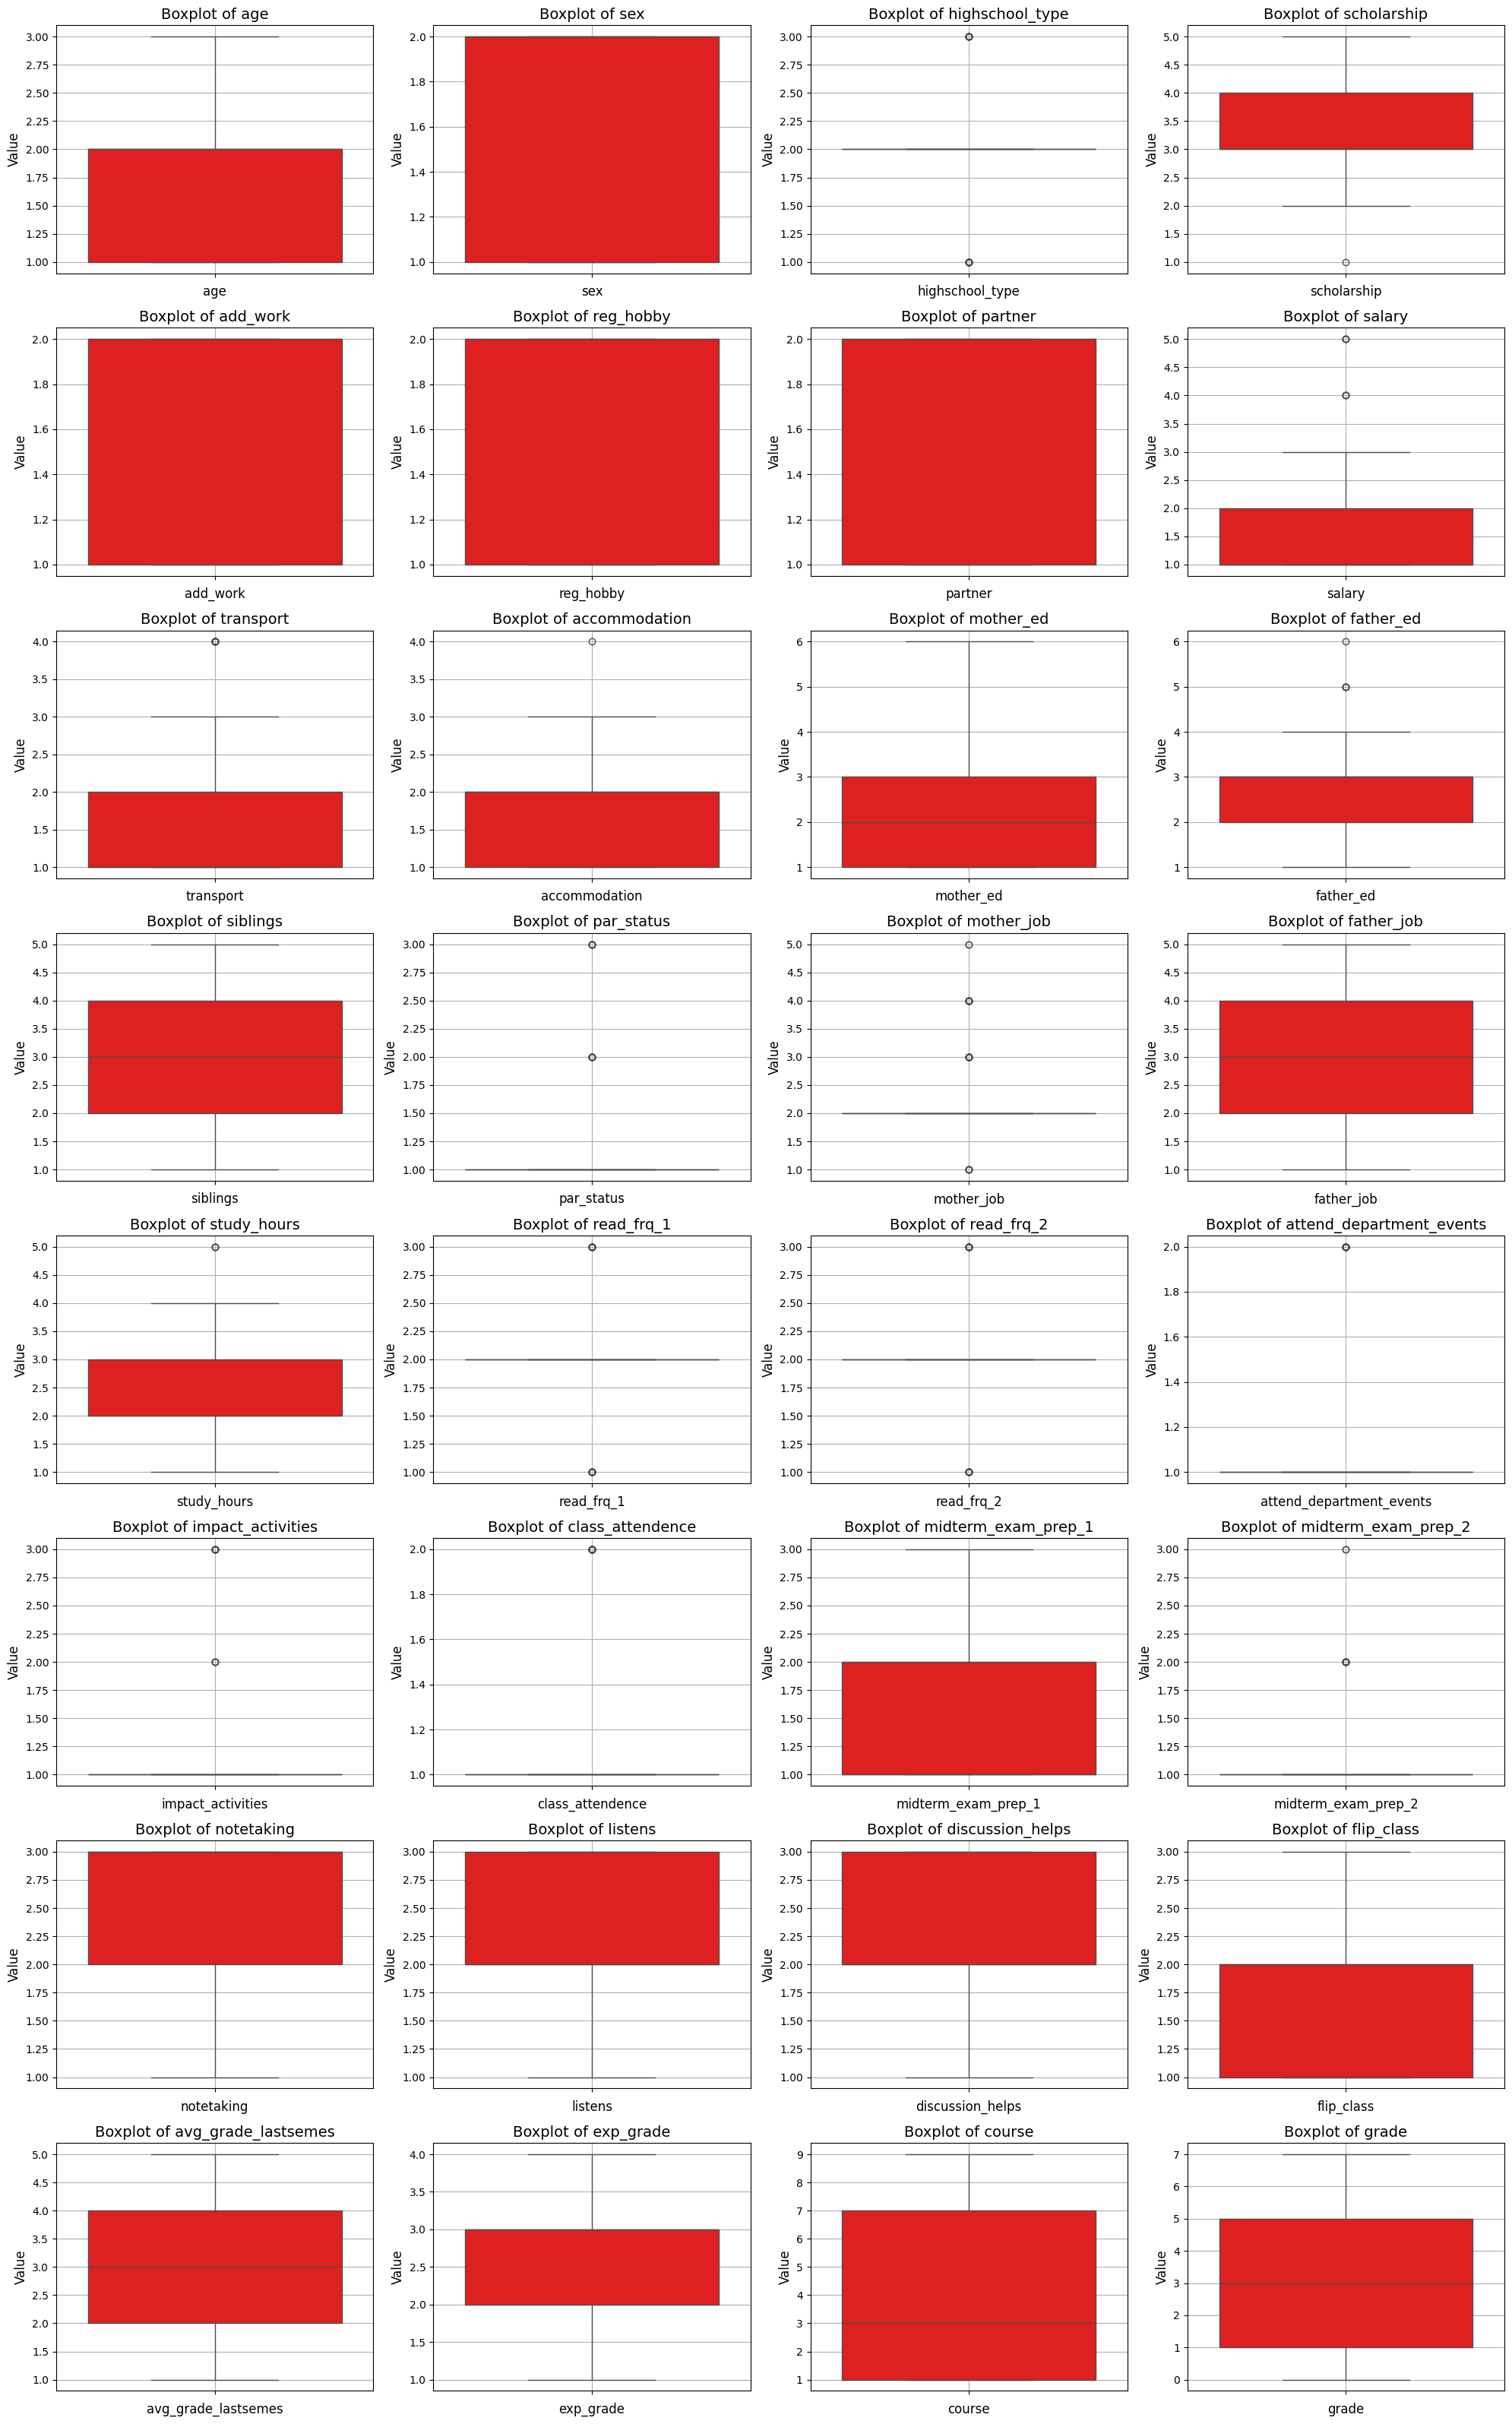

In [10]:
#Boxplot
num_features = len(df.columns)

num_cols = 4  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(num_cols * 5, num_rows * 4)) 

for i, feature in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[feature], color='red')
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

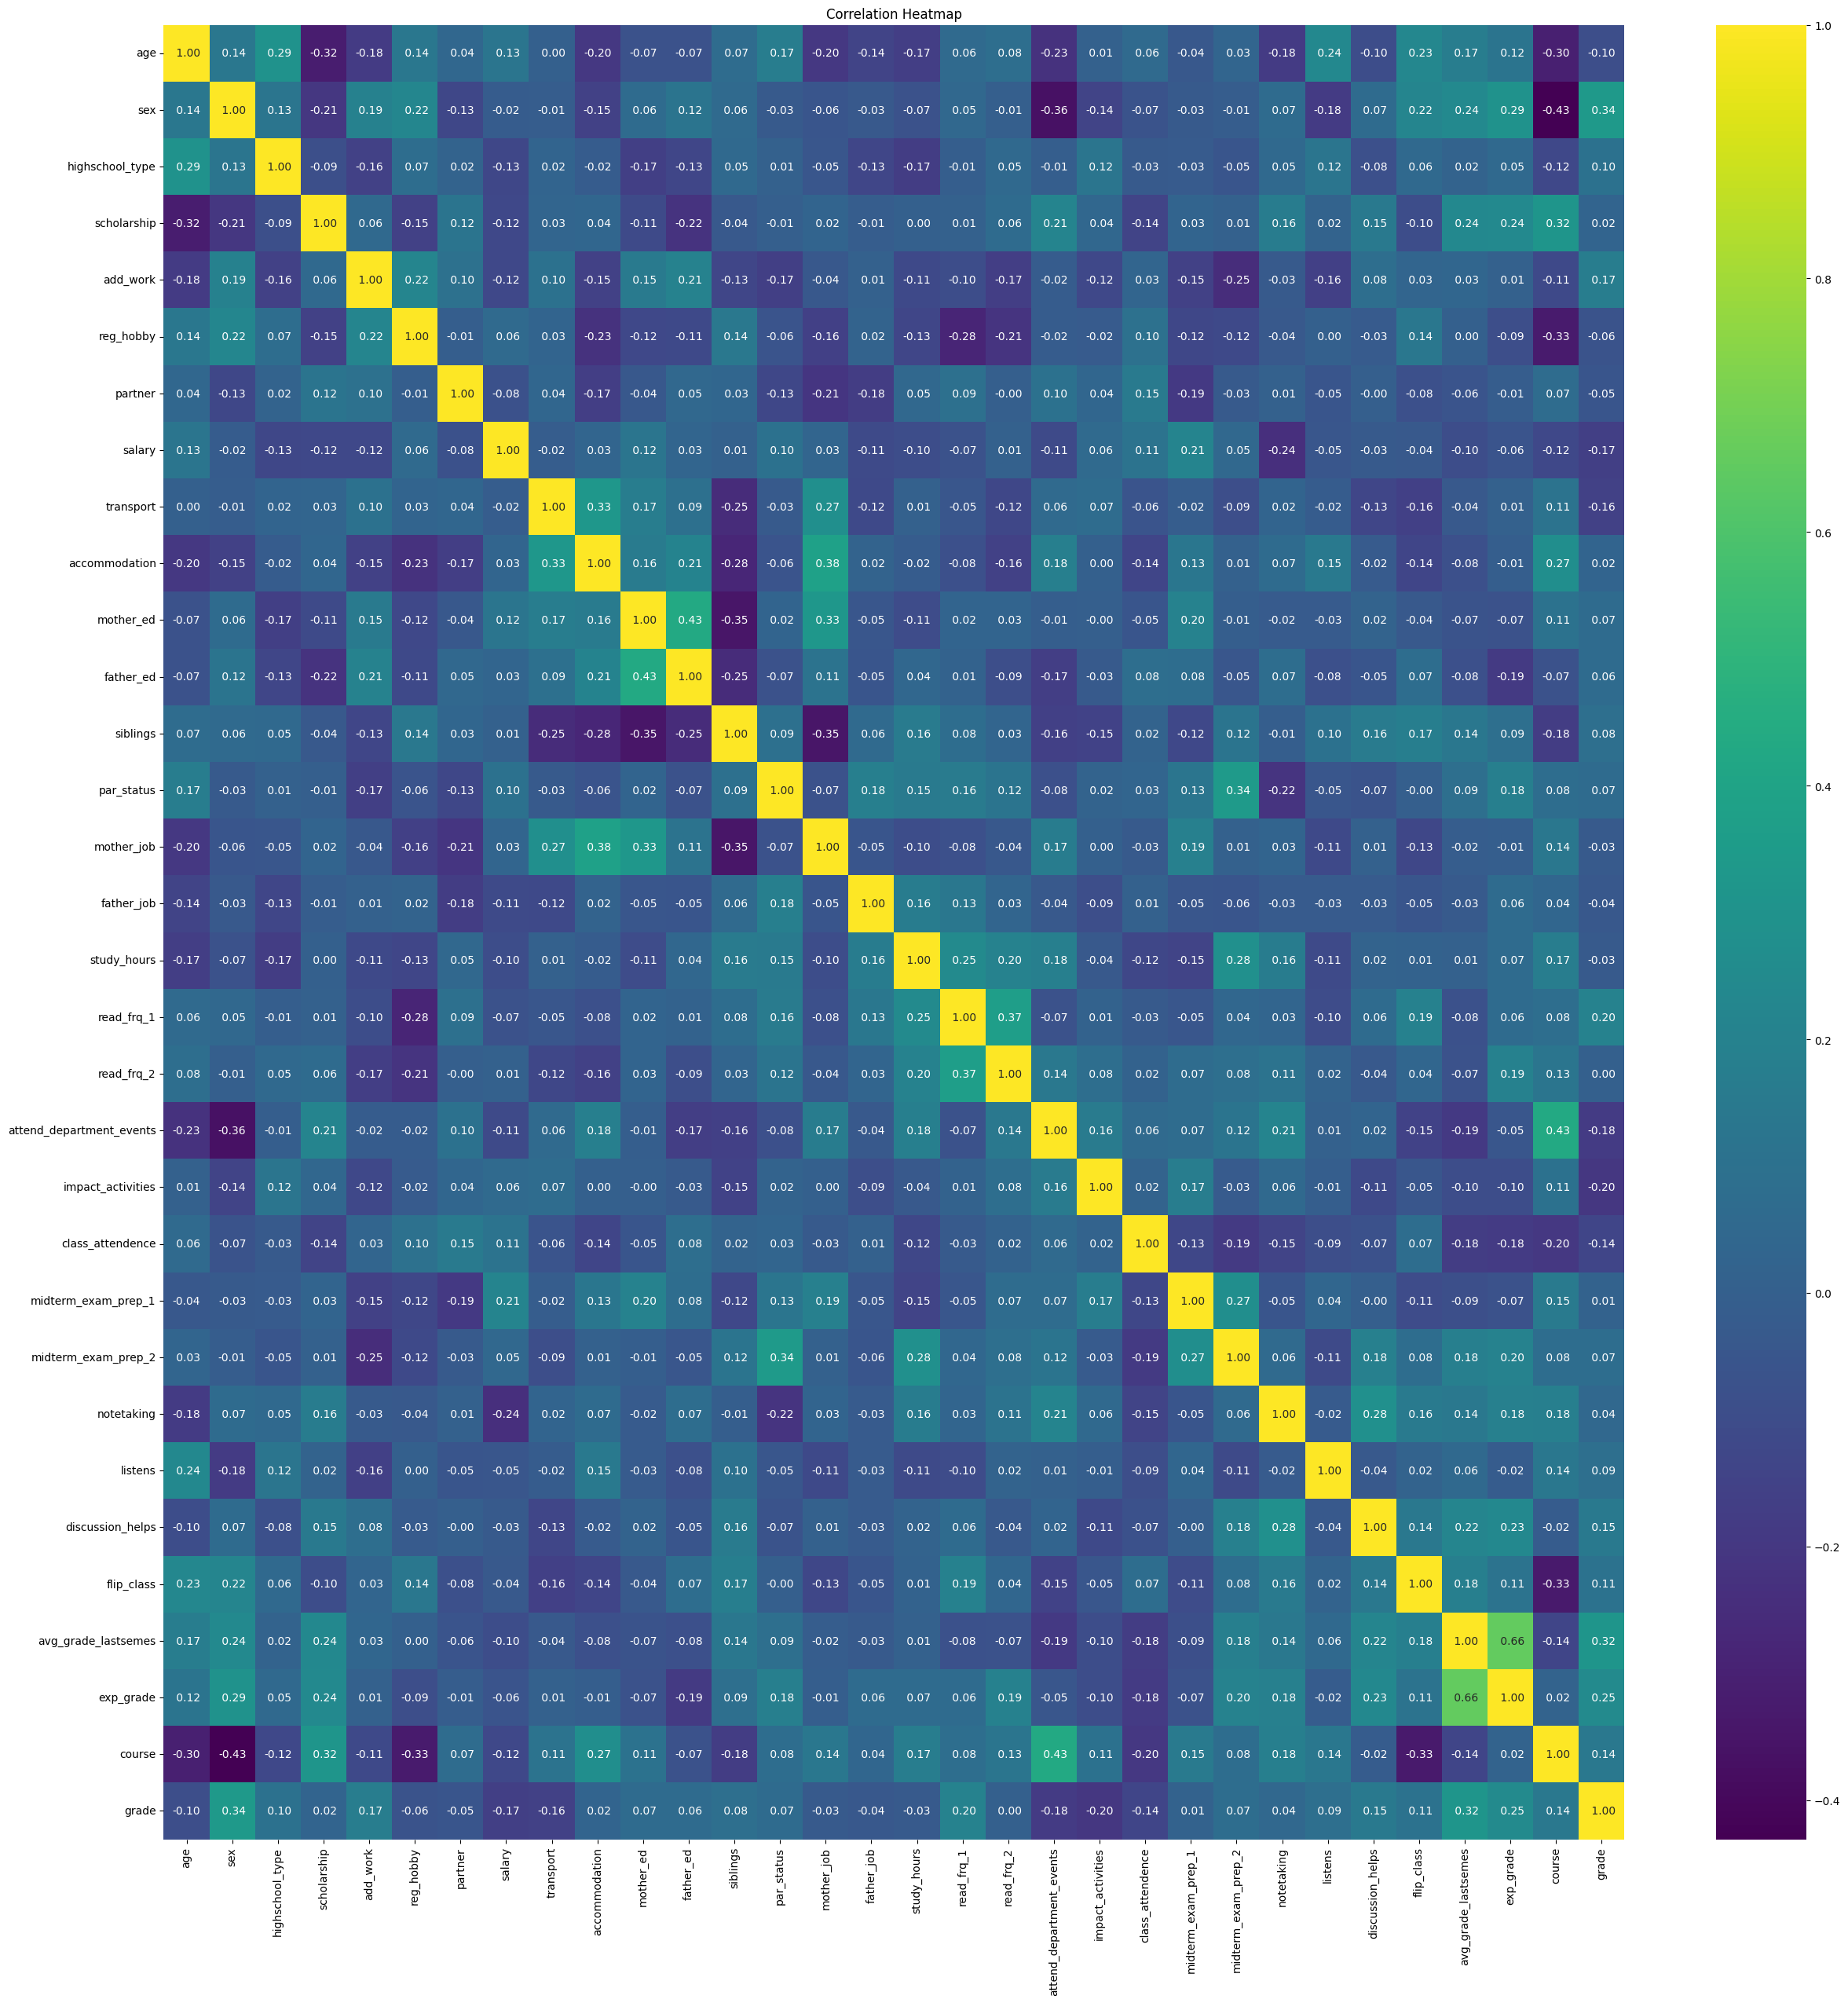

In [11]:
#looking for correlation using plot
corr = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=" .2f")
plt.title('Correlation Heatmap')
plt.show()

Menurut Correlation_Matrix tersebut, tingkat korelasi antara avg_grade_lastsemes dan exp_grade adalah 0.66 yang artinya ekspektasi mahasiswa terhadap IPK mereka di akhir memiliki kemiripan (hampir benar) dengan apa yang mereka dapatkan.

In [12]:
# df = df.copy()
# df['grade'] = df['grade'].replace({0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'})
# df.head()

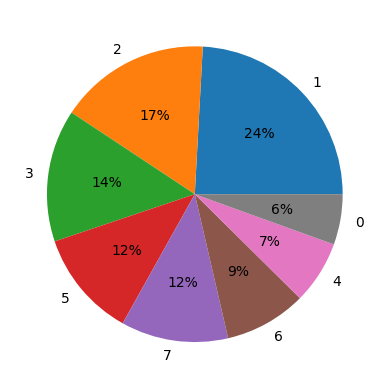

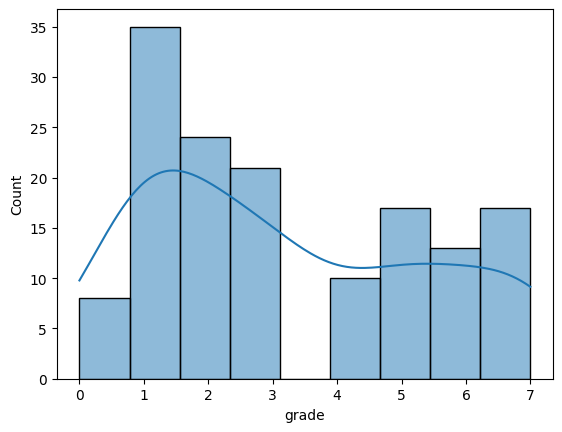

In [13]:
# GRADE PROPORTION
grades = df['grade'].value_counts()
plt.pie(grades.values, labels=grades.index, autopct='%.0f%%')
plt.show()

sorted_df = df.sort_values(by='grade', ascending=False)
sns.histplot(sorted_df, x='grade', kde=True)
plt.show()

Berdasarkan pie chart tersebut, persentase terbesar ada pada kode 1 yaitu mahasiswa dengan grade DD sebanyak 24% dimana DD merupakan nilai terendah. Kemudian, pada urutan kedua ada kode 2 yaitu mahasiswa dengan grade DD sebanyak 17%. Pada peringkat berikutnya ada kode 3 (grade DC) yaitu nilai lulus yang rendah. Selanjutnya, ada 2 grade dengan persentase yang sama sebesar 12% yaitu 5 (grade BB, nilai baik) dan 7 (grade AA, nilai tertinggi). Lalu, dilanjutkan kode 6 (grade BA, nilai sangar baik) dengan persentase 9% dan kode 4 (grade CC, nilai rata-rata atau cukup) dengan persentase 7%. Pada urutan terakhir ada kode 0 (grade fail, gagal) dengan persentase 6%.

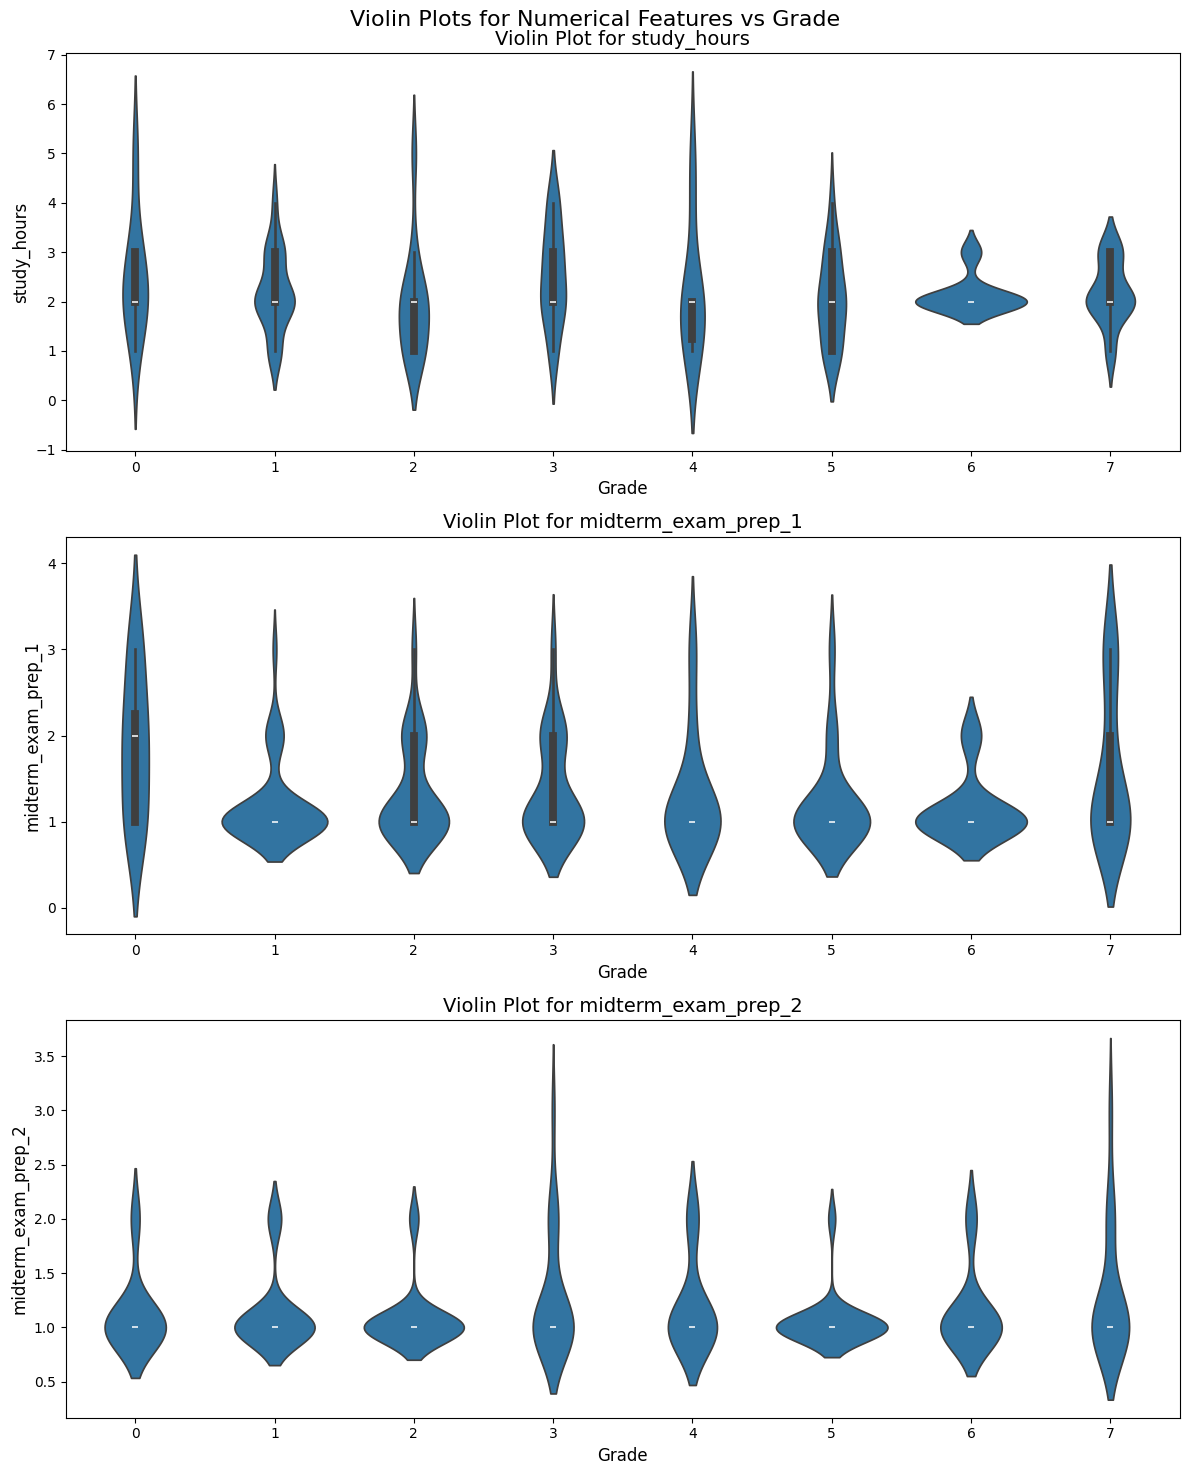

In [14]:
# Select numerical features
numerical_features = ['study_hours', 'midterm_exam_prep_1', 'midterm_exam_prep_2']

# Create subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 5*len(numerical_features)))
fig.suptitle('Violin Plots for Numerical Features vs Grade', fontsize=16)

# Ensure axes is always an array
axes = np.atleast_1d(axes)

# Create violin plots
for i, feature in enumerate(numerical_features):
    sns.violinplot(x='grade', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Violin Plot for {feature}', fontsize=14)
    axes[i].set_xlabel('Grade', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

Pada study_hours, mahasiswa yang lulus dengan nilai sangat baik memiliki durasi belajar kurang dari 5 jam setiap minggunya. Pada midterm_exam_prep_1, mahasiswa yang mendapatkan grade sangat baik merupakan mereka yang mempersiapkan exam dengan cara sendiri atau alone. Pada midterm_exam_prep_2, mahasiswa yang mendapatkan grade sangat baik merupakan mereka yang mempersiapkan exam pada saat-saat mendekati ujian.

# Lakukan uji korelasi!

## Korelasi Pearson

Korelasi Pearson: Nilai berkisar antara -1 hingga 1.

Nilai mendekati 1: Korelasi positif kuat.

Nilai mendekati -1: Korelasi negatif kuat.

Nilai mendekati 0: Tidak ada korelasi linear.


Jika dilihat korelasi bernilai 0,19 yang di mana mendekati 1 jadi dampat kita simpulkan untuk korelasi berjenis positif kuat.

In [15]:
# Pilih variabel
x = df['read_frq_1']
y = df['grade']

# Hitung korelasi Pearson
corr, p_value = pearsonr(x, y)

# Print hasil
print("Korelasi Pearson:", corr)
print("Nilai p:", p_value)

# Interpretasi hasil
if p_value < 0.05:
    if corr > 0:
        print("Ada korelasi positif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
    else:
        print("Ada korelasi negatif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
else:
    print("Tidak ada korelasi yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")

Korelasi Pearson: 0.19561706907454654
Nilai p: 0.018374584951467557
Ada korelasi positif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.


*Korelasi Pearson (r) = 0.1956*
Artinya Nilai ini menunjukkan adanya hubungan positif antara frekuensi membaca (buku dan jurnal non-ilmiah) dengan nilai akhir. Artinya, semakin sering seseorang membaca jenis bacaan tersebut, cenderung semakin tinggi pula nilai akhirnya. Namun, perlu diingat bahwa korelasi ini tergolong lemah (mendekati 0).

*Nilai p = 0.018*
Artinya Nilai p ini lebih kecil dari 0.05 (tingkat signifikansi umum). Ini artinya, hubungan positif antara frekuensi membaca dan nilai akhir yang Anda temukan signifikan secara statistik. Artinya, kecil kemungkinan hubungan positif ini terjadi secara kebetulan.

## Korelasi Spearman

In [16]:
# Pilih variabel
x = df['read_frq_1']
y = df['grade']

# Hitung korelasi Spearman
corr, p_value = spearmanr(x, y)

# Print hasil
print("Korelasi Spearman:", corr)
print("Nilai p:", p_value)

# Interpretasi hasil
if p_value < 0.05:
    if corr > 0:
        print("Ada korelasi positif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
    elif corr < 0:
        print("Ada korelasi negatif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
    else:
        print("Ada hubungan signifikan, tetapi tidak ada korelasi linear antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
else:
    print("Tidak ada korelasi yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")

Korelasi Spearman: 0.17488044829802413
Nilai p: 0.035391170619476324
Ada korelasi positif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.


## Korelasi Kendall

In [17]:
# Pilih variabel
x = df['read_frq_1']
y = df['grade']

# Hitung korelasi kendalltau
corr, p_value = kendalltau(x, y)

# Print hasil
print("Korelasi kendalltau:", corr)
print("Nilai p:", p_value)

# Interpretasi hasil
if p_value < 0.05:
    if corr > 0:
        print("Ada korelasi positif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
    elif corr < 0:
        print("Ada korelasi negatif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
    else:
        print("Ada hubungan signifikan, tetapi tidak ada korelasi linear antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")
else:
    print("Tidak ada korelasi yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.")

Korelasi kendalltau: 0.14876029991950587
Nilai p: 0.034287334212654695
Ada korelasi positif yang signifikan antara frekuensi membaca (non-scientific books/journals) dan Grade Final.
